# Fetching World Bank data using an API

An API is a communication line between your computer and a database owned by someone else. By accessing the API with Python, we can automate the process of downloading data. 

This notebook demonstrates how to Python to interact with the World Bank's API to download some data on life expectancy across countries. We will do this in two ways:
* Simple way: Using the pandas-datareader package.
* General way: Interacting directly with the API using the requests package.

## Simple way: Using **pandas-datareader**

The python package pandas-datareader is a package that helps you interact with a number of different API's. The package conects to the API, fetches the data and parses it in a way that makes it manageable for you to work with. As we will see later, this is a big help!

Before we download data, we should **always check out the documentation**! This helps us understand the syntax to use, which keywords to provide etc. The documentation for pandas-datareader is [here](https://pandas-datareader.readthedocs.io/en/latest/). We are interested in data from The World Bank, which is [here](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-wb).

We should of course also know the **data source** well. Let's have a look at the World Bank's data page to find the name of the dataset we want.

In [7]:
from pandas_datareader import wb ## wb is the World Bank API
import pandas as pd

The documentation tells us that we can look though the variables available with wb.get_indicators():

In [8]:
indicators = wb.get_indicators()
display(indicators)

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of data from Nati...,Poverty
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
...,...,...,...,...,...,...,...
24397,w_F_skl,Annual wage for skilled female workers in US$,,Gender Disaggregated Labor Database (GDLD),,b'',
24398,w_M_nsk,Annual wage for unskilled male workers in US$,,Gender Disaggregated Labor Database (GDLD),,b'',
24399,w_M_skl,Annual wage for skilled male workers in US$,,Gender Disaggregated Labor Database (GDLD),,b'',
24400,wpremia_F,Wage Premia for Females (the ratio of skilled ...,,Gender Disaggregated Labor Database (GDLD),,b'',


We can also search through indicators using wb.search():

In [9]:
matches = wb.search('life expectancy at birth')
display(matches)

,id,name,unit,source,sourceNote,sourceOrganization,topics
17407,SP.DYN.LE00.FE.IN,"Life expectancy at birth, female (years)",,World Development Indicators,Life expectancy at birth indicates the number ...,b'(1) United Nations Population Division. Worl...,Health ; Gender ; Social Development
17408,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",,World Development Indicators,Life expectancy at birth indicates the number ...,b'(1) United Nations Population Division. Worl...,Health
17409,SP.DYN.LE00.MA.IN,"Life expectancy at birth, male (years)",,World Development Indicators,Life expectancy at birth indicates the number ...,b'(1) United Nations Population Division. Worl...,Health ; Gender ; Social Development
17412,SP.DYN.LIFE.MF,Life Expectancy at Birth(years),,WDI Database Archives,,b'',


It seems like the indicator SP.DYN.LE00.IN contains the information we want. Let's set up the parameters for the API call and download the data:

In [10]:
params = {'symbols': 'SP.DYN.LE00.IN',
          'countries': ['US', 'CA', 'MX'], ## US, Canada, Mexico
          'start': 1980,
          'end': 2022,} 
wbdf = wb.WorldBankReader(**params).read()

Let's checkout the data!

In [11]:
wbdf.head()

SP.DYN.LE00.IN
country year                
Canada  2022             NaN
        2021       82.596610
        2020       81.670488
        2019       82.228780
        2018       81.843902

<Axes: title={'center': 'Life Expectancy at Birth'}, xlabel='year'>

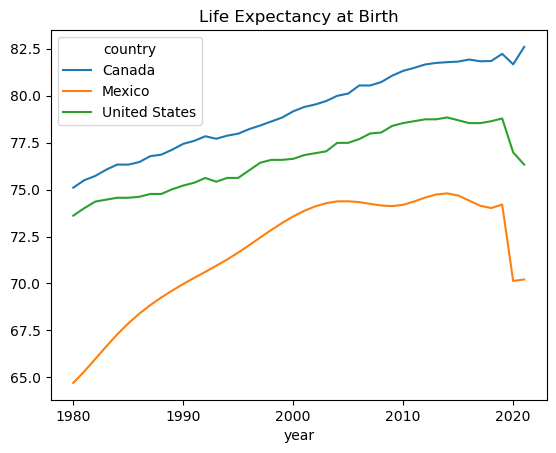

In [12]:
(wbdf.reset_index()
    .pivot(index='year', columns='country', values='SP.DYN.LE00.IN')
    .plot(title='Life Expectancy at Birth'))

## General way: Using the **requests** package

Some (most) API's don't have pre-written python packages that helps us interact with them. Instead, we must use the 

The package **requests** allows us to access the internet and download data. It is well suited for API access and web scraping.

In [13]:
import requests

Let's get the same data directly from the world Bank API. See documentation [here](https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information).

We access the API through an url. The documentation tells us that the "base" url for the World Bank API is "https://api.worldbank.org/v2". On top of that, we need to provide it with information about wich indicators, countries and years, we want:

In [14]:
url = 'https://api.worldbank.org/v2'        ## base
url = url + '/country/USA;CAN;MEX'          ## countries
url = url + '/indicator/SP.DYN.LE00.IN'     ## indicator
url = url + '?date=1980:2022'               ## date range

url = url + '&format=json'                  ## response format
url = url + '&per_page=1000'                ## max per page

print(url)

https://api.worldbank.org/v2/country/USA;CAN;MEX/indicator/SP.DYN.LE00.IN?date=1980:2022&format=json&per_page=1000


Let's download the data using requests.get:

In [19]:
wb_raw = requests.get(url).json() ## get the data and parse is as JSON

In [20]:
## Let's have a look..
print(wb_raw)

## oh no...

[{'page': 1, 'pages': 1, 'per_page': 1000, 'total': 129, 'sourceid': '2', 'lastupdated': '2024-02-21'}, [{'indicator': {'id': 'SP.DYN.LE00.IN', 'value': 'Life expectancy at birth, total (years)'}, 'country': {'id': 'CA', 'value': 'Canada'}, 'countryiso3code': 'CAN', 'date': '2022', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.DYN.LE00.IN', 'value': 'Life expectancy at birth, total (years)'}, 'country': {'id': 'CA', 'value': 'Canada'}, 'countryiso3code': 'CAN', 'date': '2021', 'value': 82.5966097560976, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.DYN.LE00.IN', 'value': 'Life expectancy at birth, total (years)'}, 'country': {'id': 'CA', 'value': 'Canada'}, 'countryiso3code': 'CAN', 'date': '2020', 'value': 81.6704878048781, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.DYN.LE00.IN', 'value': 'Life expectancy at birth, total (years)'}, 'country': {'id': 'CA', 'value': 'Canada'}, 'countryiso3code': 'C

We need to have a inspect the output a bit to see what is what... Turns out that wb_raw is a list, where the first element wb_raw[0] contains metadata about the API call and the second element wb_raw[1] contains the actual data. Let's clean it up a bit...

In [21]:
wb_clean = (pd.DataFrame(wb_raw[1])
          .loc[:, ['countryiso3code', 'date', 'value']]
          .rename(columns={'countryiso3code': 'country',
                           'date': 'year',
                           'value': 'life_expectancy'})
          .replace({'country': {'CAN': 'Canada', 'MEX': 'Mexico', 'USA': 'United States'}})
          .pivot(index='year', columns='country', values='life_expectancy'))

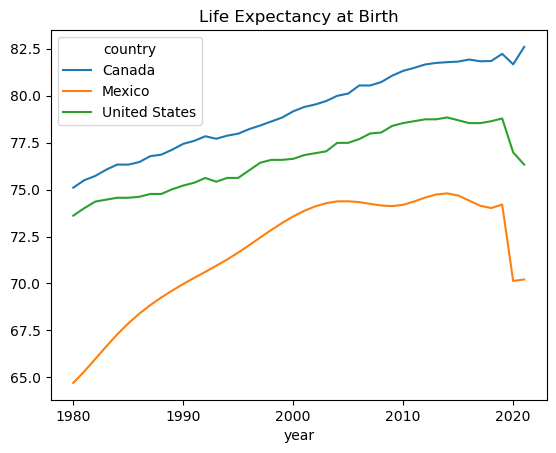

In [22]:
wb_clean.plot(title='Life Expectancy at Birth');

The data is the same but it took a few more steps to get to the end result - in the previous section, pandas-datareader constructed the url and did the data cleaning for us!

But it is nice to know how to do these things ourselves. We might one day need to work with an API that does not have a pre-written python package!

## Relevant info for working with API's
* Some API's are free to use. Some require you to authenticate yourself by providing a use-specific access token in the url. 
* API's sometimes limit the amount of data you can download in one request. If you want to download large amounts of data, you might need to split the download into several requests.
* Somtimes, API's also limit the number of requests you can make within a certain timespan. Remember that each time you run the line of code that downloads data (eg. wb.WorldBankReader.read, requests.get), you make a new request.
* Some API's require payment to use.

All of this differs from API to API. Therefore, **read the documentation**! It'll tell you exactly how to interact with the API and what information to provide it.